

---

# **Seed usada para Reprodutibilidade dos Testes**

Tal seed garante que todos não gera preucupações devido dentro dos padrões de monitoramento do recurso de CPU do servidor


In [1]:
set.seed("123")

---

# **Cenário monitoramento com CPU do servidor em estado ideal**
Tal cenário **não** **gera** preucupações devido dentro dos padrões de monitoramento do recurso de CPU do servidor

### **Definição das métricas de alerta**
1.   Alerta Critico: > 90%
2.   Alerta Anormal: 85% ≤ x ≤ 00%
2.   Normal: < 85%

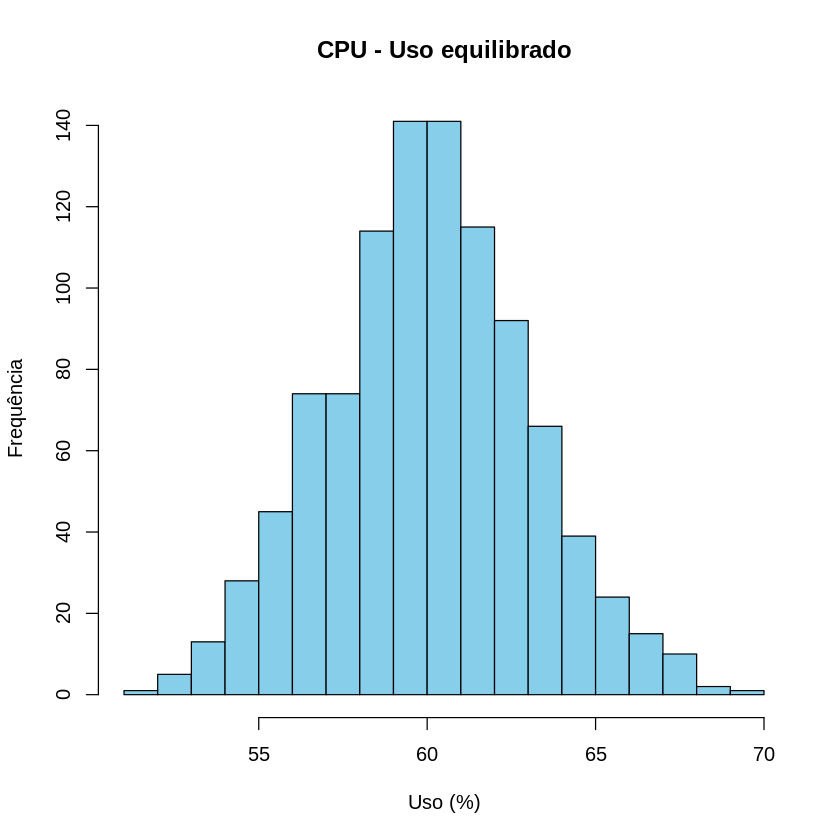

In [2]:
cpu_equilibrado <- rnorm(1000, mean = 60, sd = 3)
cpu_equilibrado <- pmin(pmax(cpu_equilibrado, 0), 100)
hist(cpu_equilibrado, main="CPU - Uso equilibrado", xlab="Uso (%)", ylab = "Frequência", col="skyblue", breaks=20)

---

# **Cenário monitoramento com CPU do servidor em estado ocioso**
Tal cenário **não gera** preucupações devido a já ser esperado para o monitoramento da CPU

### **Definição das métricas de alerta**
1.   Alerta Critico: > 90%
2.   Alerta Anormal: 85% ≤ x ≤ 00%
2.   Normal: < 85%

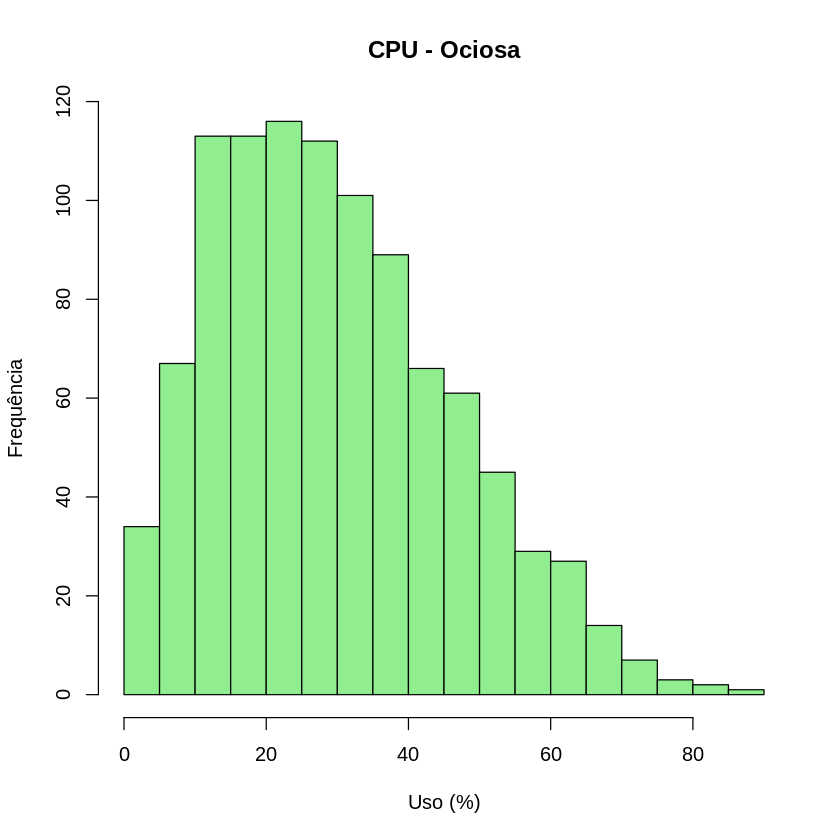

In [3]:
cpu_ociosa <- rbeta(1000, shape1 = 2, shape2 = 5) * 100
hist(cpu_ociosa, main="CPU - Ociosa", xlab="Uso (%)", ylab = "Frequência", col="lightgreen", breaks=20)

---

# **Cenário monitoramento com CPU do servidor em estado de sobrecarga**

Tal cenário **gera** preucupações devido estar fora dos padrões de monitoramento de CPU

### **Definição das métricas de alerta**
1.   Alerta Critico: > 90%
2.   Alerta Anormal: 85% ≤ x ≤ 00%
2.   Normal: < 85%

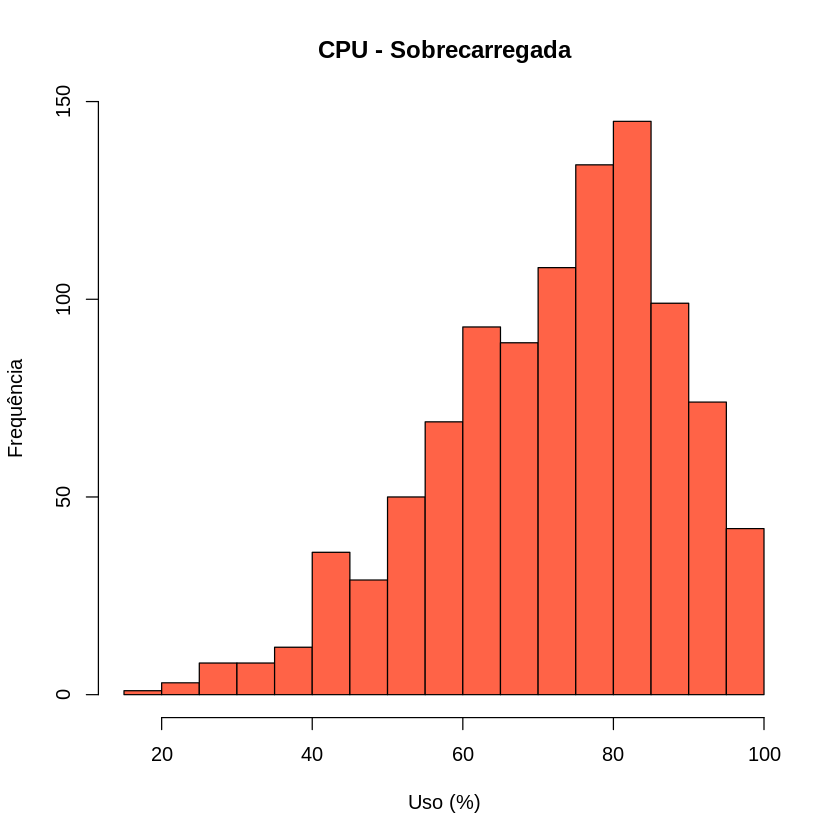

In [4]:
cpu_sobrecarregada <- rbeta(1000, shape1 = 5, shape2 = 2) * 100
hist(cpu_sobrecarregada, main="CPU - Sobrecarregada", xlab="Uso (%)", ylab = "Frequência", col="tomato", breaks=20)

---

# **Cenário com rede apresentando estabilidade na perda de pacotes**

Tal cenário **não gera** preucupações devido a já ser esperado para o monitoramento

### **Definição das métricas de alerta**
1.   Alerta Critico: > 10%
2.   Alerta Anormal:  2% ≤ x ≤ 5%
2.   Normal: <2%

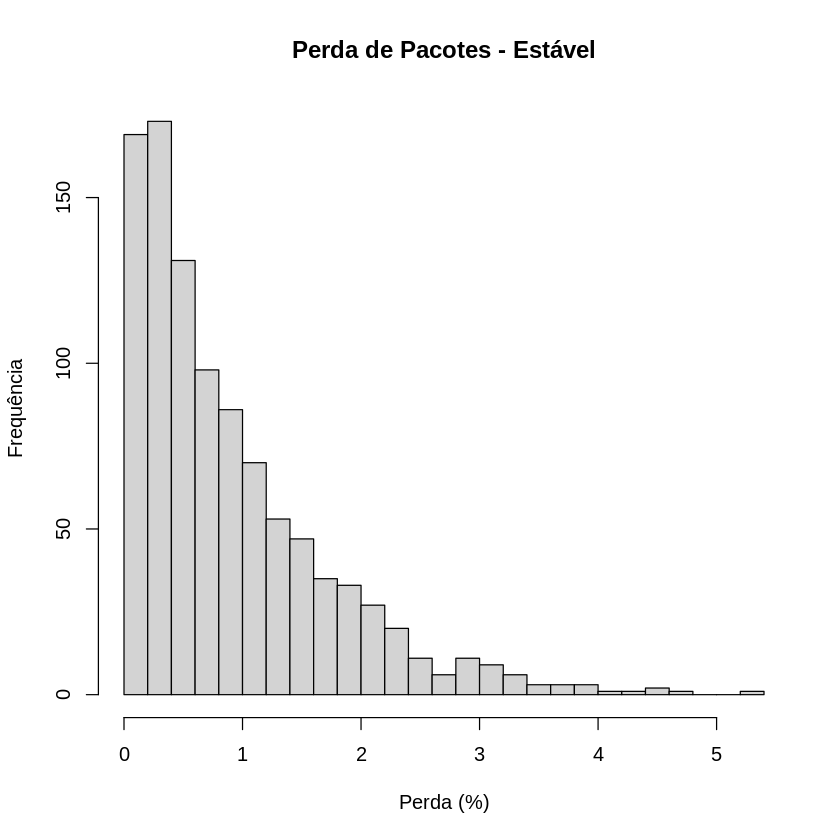

In [5]:
perda_estavel <- rbeta(1000, shape1 = 1, shape2 = 10) * 10
hist(perda_estavel, main="Perda de Pacotes - Estável", xlab="Perda (%)", ylab = "Frequência", col="lightgray", breaks=20)

---

# **Cenário com rede apresentando instabilidade na perda de pacotes**

Tal cenário **gera** preucupações devido estar fora dos padrões de monitoramento de rede

### **Definição das métricas de alerta**
1.   Alerta Critico: > 10%
2.   Alerta Anormal:  2% ≤ x ≤ 5%
2.   Normal: < 2%

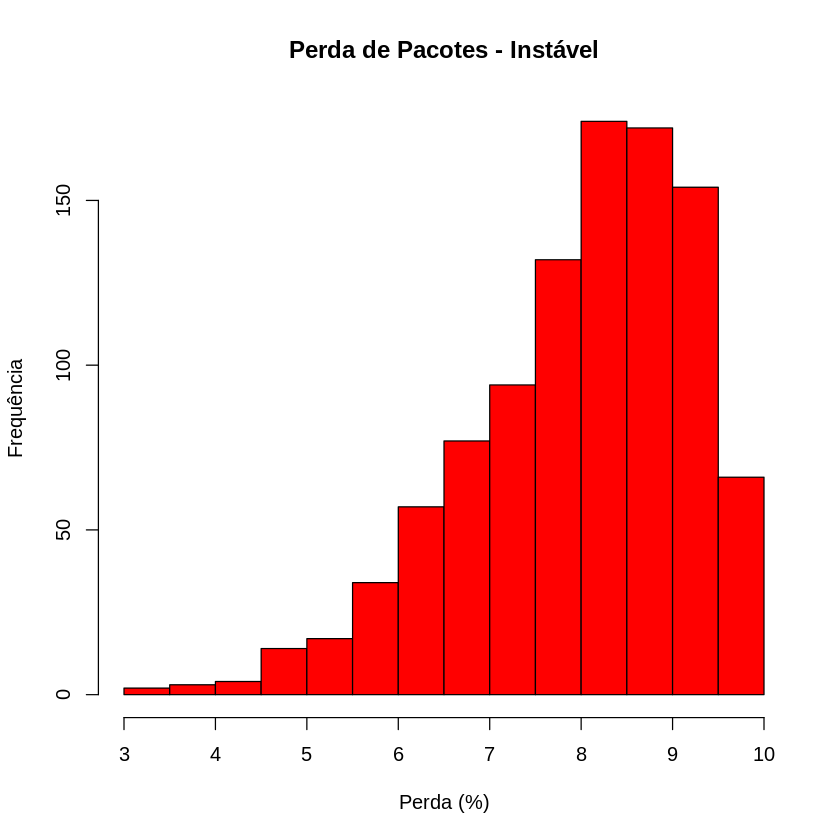

In [6]:
perda_instavel <- rbeta(1000, shape1 = 8, shape2 = 2) * 10
hist(perda_instavel, main="Perda de Pacotes - Instável", xlab="Perda (%)", ylab = "Frequência", col="red", breaks=20)

---

# **Cenário com RAM apresentando números equilibrados**

Tal cenário **não** **gera** preucupações devido estar dentro dos padrões de monitoramento do recurso de RAM do servidor

### **Definição das métricas de alerta**
1.   Alerta Critico: > 90%
2.   Alerta Anormal: 85% ≤ x ≤ 00%
2.   Normal: < 85%

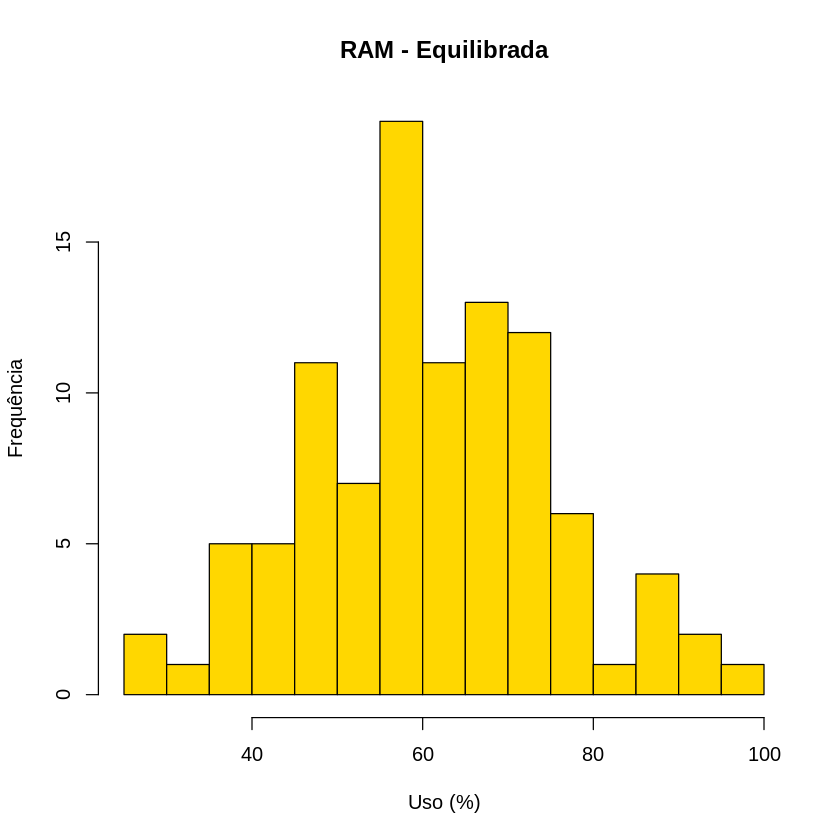

In [7]:
ram_moderada <- rnorm(100, mean = 60, sd = 15)
ram_moderada <- pmin(pmax(ram_moderada, 0), 100)
hist(ram_moderada, main="RAM - Equilibrada", xlab="Uso (%)", ylab = "Frequência", col="gold", breaks=20)

---

# **Cenário com baixo uso de recursos de Disco**

Tal cenário **não** **gera** preucupações, devido ao fato de que utilizar pouco armazenamento ser comunmente vantajo-so aos clientes

### **Definição das métricas de alerta**
1.   Alerta Critico: > 90%
2.   Alerta Anormal: 85% ≤ x ≤ 00%
2.   Normal: < 85%

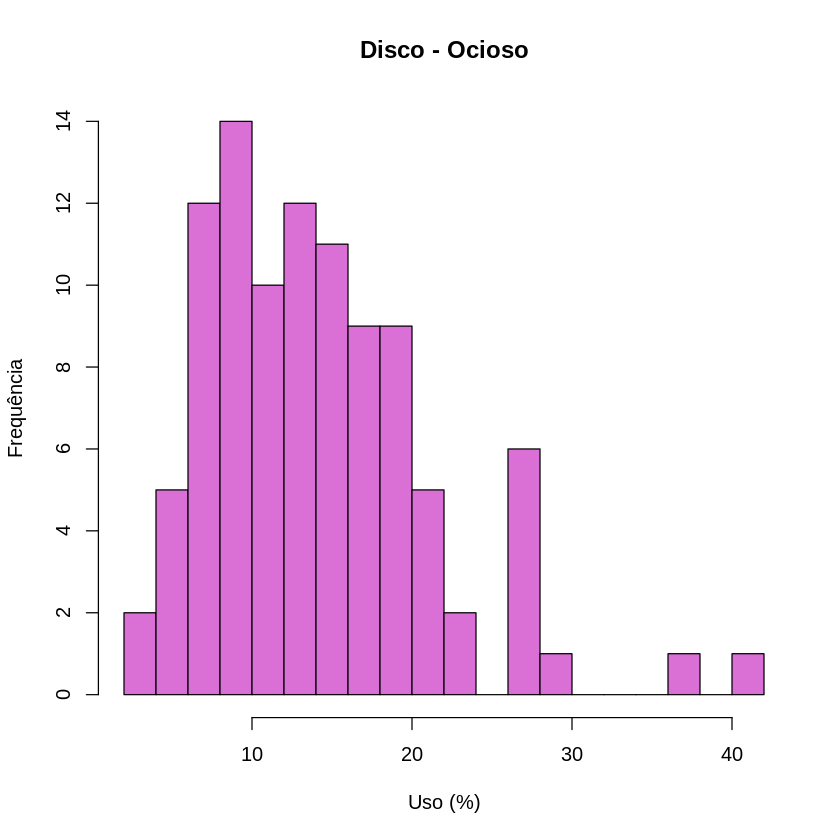

In [8]:
disco_picos <- rlnorm(100, meanlog = 2.5, sdlog = 0.5)
disco_picos <- pmin(disco_picos, 100)
hist(disco_picos, main="Disco - Ocioso", xlab="Uso (%)", ylab = "Frequência", col="orchid", breaks=20)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




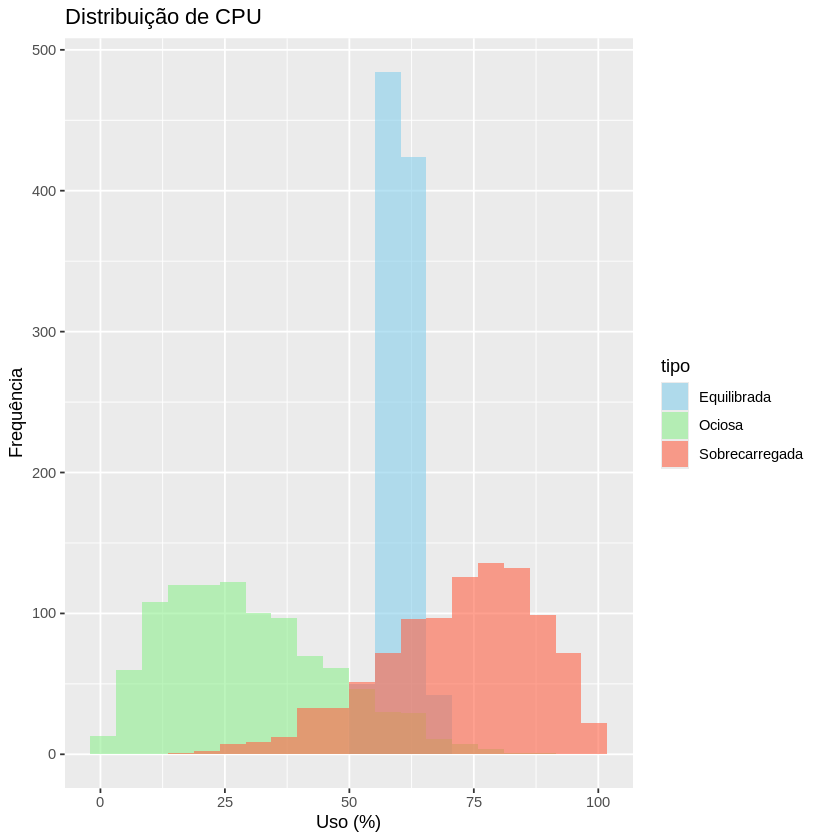

In [9]:
library(ggplot2)
library(dplyr)
library(tidyr)

df <- data.frame(
  valor = c(cpu_equilibrado, cpu_ociosa, cpu_sobrecarregada),
  tipo = c(rep("Equilibrada", length(cpu_equilibrado)),
           rep("Ociosa", length(cpu_ociosa)),
           rep("Sobrecarregada", length(cpu_sobrecarregada)))
)

ggplot(df, aes(x = valor, fill = tipo)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 20) +
  labs(title = "Distribuição de CPU", x = "Uso (%)", y = "Frequência") +
  scale_fill_manual(values = c("skyblue", "lightgreen", "tomato"))


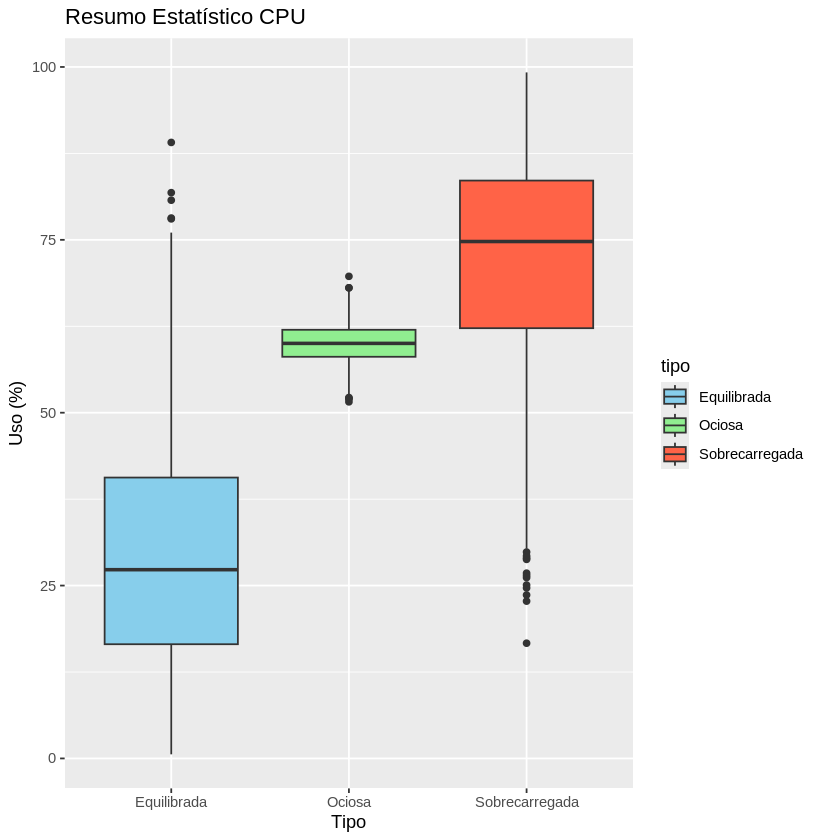

In [16]:
df_cpu <- data.frame(
  valor = c(cpu_equilibrado, cpu_ociosa, cpu_sobrecarregada),
  tipo = c(rep("Ociosa", length(cpu_ociosa)),
           rep("Equilibrada", length(cpu_equilibrado)),
           rep("Sobrecarregada", length(cpu_sobrecarregada)))
)

ggplot(df_cpu, aes(x = tipo, y = valor, fill = tipo)) +
  geom_boxplot() +
  labs(title = "Resumo Estatístico CPU", y = "Uso (%)", x = "Tipo") +
  scale_fill_manual(values = c("skyblue", "lightgreen", "tomato"))


In [11]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’





Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




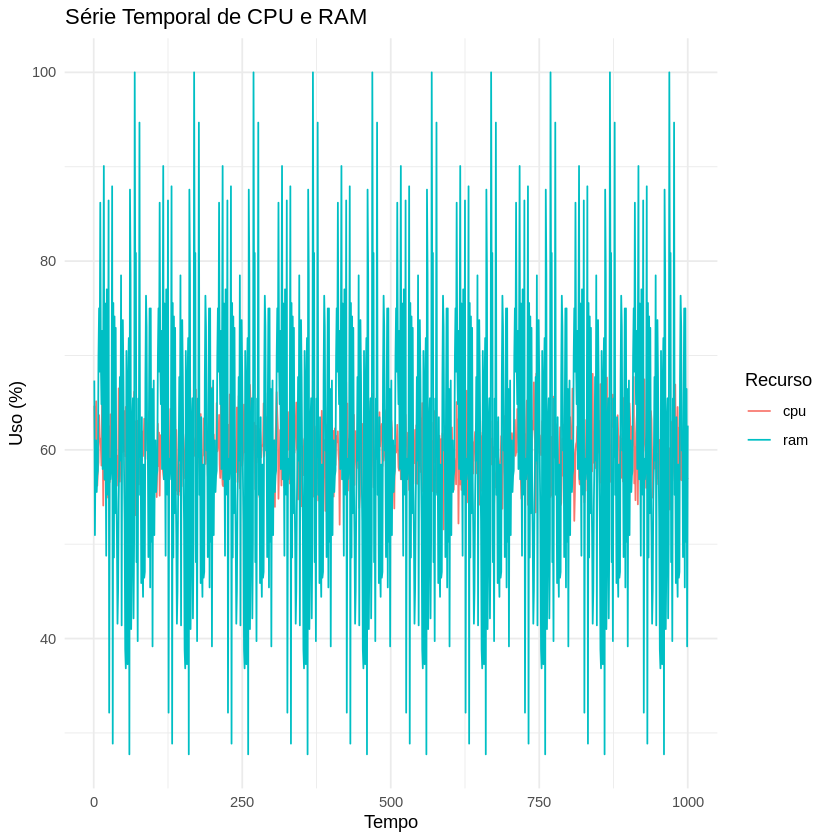

In [12]:
tempo <- 1:1000
df_ts <- data.frame(
  tempo = tempo,
  cpu = cpu_equilibrado,
  ram = ram_moderada
)

library(reshape2)
df_long <- melt(df_ts, id.vars = "tempo")

ggplot(df_long, aes(x = tempo, y = value, color = variable)) +
  geom_line() +
  labs(title = "Série Temporal de CPU e RAM", x = "Tempo", y = "Uso (%)", color = "Recurso") +
  theme_minimal()

In [13]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



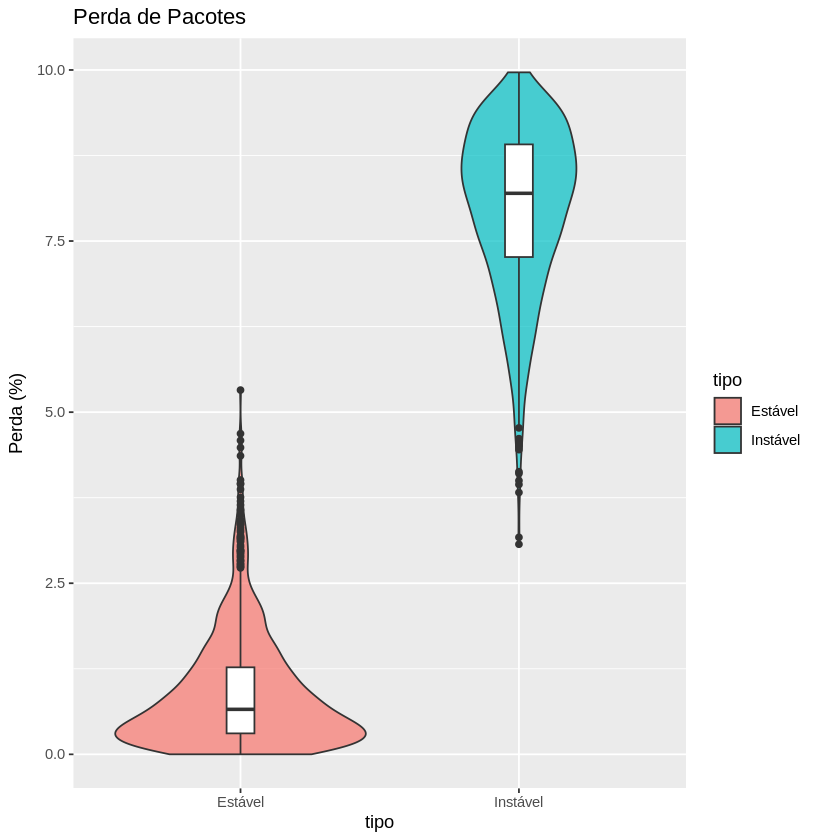

In [14]:
df_perda <- data.frame(
  valor = c(perda_estavel, perda_instavel),
  tipo = c(rep("Estável", length(perda_estavel)),
           rep("Instável", length(perda_instavel)))
)

ggplot(df_perda, aes(x = tipo, y = valor, fill = tipo)) +
  geom_violin(alpha = 0.7) +
  geom_boxplot(width=0.1, fill="white") +
  labs(title = "Perda de Pacotes", y = "Perda (%)")
